# Riposo

Esercizio di pulizia manuale dei dati

Usiamo il file riposo.csv come esercizio di pulizia manuale dei dati.

Abbiamo notato che il file contiene dei dati formattati in modo incoerente, con alcune righe che presentano valori mancanti, formattazioni variabili o virgole extra dentro le colonne.

Dopo un'analisi preliminare, abbiamo deciso di correggere manualmente questi errori per garantire che i dati siano coerenti e pronti per l'analisi. Aggiustare il file in un editor di testo rischia di lasciare refusi se il file è grande, quindi useremo Python per automatizzare il processo.

In [45]:
column_names = []
data_values = []
i = 0
with open("data/Riposo.csv", encoding='utf-8-sig') as file: 
    # encoding='utf-8-sig' usato per evitare di avere ufeff all'inizio della prima riga (https://tutorialreference.com/python/examples/faq/python-how-to-remove-ufeff-from-string)
    for line in file:
        i += 1
        values = line.strip().split(',')
        if not column_names:
            column_names = values
            continue

        if len(values) == len(column_names):
            data_values.append(values)
        else:
            data = []
            for val in values:
                if val.startswith(' ') and len(data)>0:
                    data[-1] = data[-1] + val
                else:
                    data.append(val)
            data_values.append(data)
                

In [46]:
import pandas as pd

df = pd.DataFrame(data_values, columns=column_names)
df

,Data,Media pun.,Qualità media,Durata media,Esigenza media di sonno,Media ora di andare a dormire,Media tempo di veglia
0,Set 25 - Ott 1,64,Discreto,6h 13min,8h 18min,9:46 PM,4:42 AM
1,Set 18-24,60,Discreto,4h 48min,8h 47min,10:47 PM,3:49 AM
2,Set 11-17,64,Discreto,6h 0min,8h 54min,9:14 PM,3:58 AM
3,Set 4-10,58,Scarso,4h 55min,8h 39min,10:44 PM,4:10 AM
4,Ago 28 - Set 3,62,Discreto,5h 51min,8h 50min,9:09 PM,3:47 AM
5,Ago 21-27,57,Scarso,5h 27min,8h 43min,10:29 PM,4:53 AM
6,Ago 14-20,63,Discreto,5h 46min,8h 53min,10:00 PM,4:31 AM
7,Ago 7-13,56,Scarso,5h 21min,8h 33min,11:19 PM,5:02 AM
8,Lug 31 - Ago 6,61,Discreto,5h 8min,8h 45min,12:16 AM,5:54 AM
9,Lug 24-30,67,Discreto,6h 7min,8h 22min,12:18 AM,7:04 AM


In [ ]:
import datetime as dt

def format_dates(date_str):
    # Aggiusta il formato della data (Set 18-24 oppure Set 25 - Ott 1 oppure Dic 26 2024 - Gen 1 2025, oppure Dic 19-25 2024 in "data_inizio - data_fine" e date nel formato yyyy-MM-dd)
    months = {
        'Gen': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'Mag': '05', 'Giu': '06',
        'Lug': '07', 'Ago': '08', 'Set': '09', 'Ott': '10', 'Nov': '11', 'Dic': '12'
    }
    parts = date_str.split('-')
    start_date = None
    end_date = None
    if len(parts) == 2:
        start = parts[0].strip().split()
        end = parts[1].strip().split()
        if len(start) == 2:
            start_month, start_day = start
            start_date = dt.date(2025, int(months[start_month]), int(start_day))
        else: #len(start) == 3:
            start_month, start_day, start_year = start
            start_date = dt.date(int(start_year), int(months[start_month]), int(start_day))

        if len(end) == 1:
            end_day = end[0]
            end_date = dt.date(start_date.year, start_date.month, int(end_day))
        elif len(end) == 2:
            if len(end[1]) == 4: # se il secondo pezzo è lungo 4, è l'anno
                end_day, end_year = end
                start_date = dt.date(int(end_year), start_date.month, start_date.day)
                end_date = dt.date(int(end_year), start_date.month, int(end_day))
            else:
                end_month, end_day = end
                end_date = dt.date(2025, int(months[end_month]), int(end_day))
        elif len(end) == 3:
            end_month, end_day, end_year = end
            end_date = dt.date(int(end_year), int(months[end_month]), int(end_day))

    return start_date,end_date



In [48]:
dates = df['Data'].apply(format_dates)
df['Data Inizio'] = dates.apply(lambda x: x[0])
df['Data Fine'] = dates.apply(lambda x: x[1])
df = df.drop(columns=['Data'])
df

,Media pun.,Qualità media,Durata media,Esigenza media di sonno,Media ora di andare a dormire,Media tempo di veglia,Data Inizio,Data Fine
0,64,Discreto,6h 13min,8h 18min,9:46 PM,4:42 AM,2025-09-25,2025-10-01
1,60,Discreto,4h 48min,8h 47min,10:47 PM,3:49 AM,2025-09-18,2025-09-24
2,64,Discreto,6h 0min,8h 54min,9:14 PM,3:58 AM,2025-09-11,2025-09-17
3,58,Scarso,4h 55min,8h 39min,10:44 PM,4:10 AM,2025-09-04,2025-09-10
4,62,Discreto,5h 51min,8h 50min,9:09 PM,3:47 AM,2025-08-28,2025-09-03
5,57,Scarso,5h 27min,8h 43min,10:29 PM,4:53 AM,2025-08-21,2025-08-27
6,63,Discreto,5h 46min,8h 53min,10:00 PM,4:31 AM,2025-08-14,2025-08-20
7,56,Scarso,5h 21min,8h 33min,11:19 PM,5:02 AM,2025-08-07,2025-08-13
8,61,Discreto,5h 8min,8h 45min,12:16 AM,5:54 AM,2025-07-31,2025-08-06
9,67,Discreto,6h 7min,8h 22min,12:18 AM,7:04 AM,2025-07-24,2025-07-30


In [49]:
# remove lines with missing data or '--'
df.replace('--', pd.NA, inplace=True)
df.dropna(inplace=True, axis=0)
df

,Media pun.,Qualità media,Durata media,Esigenza media di sonno,Media ora di andare a dormire,Media tempo di veglia,Data Inizio,Data Fine
0,64,Discreto,6h 13min,8h 18min,9:46 PM,4:42 AM,2025-09-25,2025-10-01
1,60,Discreto,4h 48min,8h 47min,10:47 PM,3:49 AM,2025-09-18,2025-09-24
2,64,Discreto,6h 0min,8h 54min,9:14 PM,3:58 AM,2025-09-11,2025-09-17
3,58,Scarso,4h 55min,8h 39min,10:44 PM,4:10 AM,2025-09-04,2025-09-10
4,62,Discreto,5h 51min,8h 50min,9:09 PM,3:47 AM,2025-08-28,2025-09-03
5,57,Scarso,5h 27min,8h 43min,10:29 PM,4:53 AM,2025-08-21,2025-08-27
6,63,Discreto,5h 46min,8h 53min,10:00 PM,4:31 AM,2025-08-14,2025-08-20
7,56,Scarso,5h 21min,8h 33min,11:19 PM,5:02 AM,2025-08-07,2025-08-13
8,61,Discreto,5h 8min,8h 45min,12:16 AM,5:54 AM,2025-07-31,2025-08-06
9,67,Discreto,6h 7min,8h 22min,12:18 AM,7:04 AM,2025-07-24,2025-07-30


In [50]:
def durata_in_min(durata):
    parts = durata.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
            total_minutes += hours * 60
        elif 'm' in part:
            minutes = int(part.replace('min', ''))
            total_minutes += minutes
    return total_minutes

df['Durata media(min)'] = df['Durata media'].apply(durata_in_min)
df['Esigenza media di sonno(min)'] = df['Esigenza media di sonno'].apply(durata_in_min)
df.drop(columns=['Durata media', 'Esigenza media di sonno'], inplace=True)
df

,Media pun.,Qualità media,Media ora di andare a dormire,Media tempo di veglia,Data Inizio,Data Fine,Durata media(min),Esigenza media di sonno(min)
0,64,Discreto,9:46 PM,4:42 AM,2025-09-25,2025-10-01,373,498
1,60,Discreto,10:47 PM,3:49 AM,2025-09-18,2025-09-24,288,527
2,64,Discreto,9:14 PM,3:58 AM,2025-09-11,2025-09-17,360,534
3,58,Scarso,10:44 PM,4:10 AM,2025-09-04,2025-09-10,295,519
4,62,Discreto,9:09 PM,3:47 AM,2025-08-28,2025-09-03,351,530
5,57,Scarso,10:29 PM,4:53 AM,2025-08-21,2025-08-27,327,523
6,63,Discreto,10:00 PM,4:31 AM,2025-08-14,2025-08-20,346,533
7,56,Scarso,11:19 PM,5:02 AM,2025-08-07,2025-08-13,321,513
8,61,Discreto,12:16 AM,5:54 AM,2025-07-31,2025-08-06,308,525
9,67,Discreto,12:18 AM,7:04 AM,2025-07-24,2025-07-30,367,502


In [51]:
# converti orario in 24h
def convert_to_24h(time_str):
    if 'AM' in time_str or 'PM' in time_str:
        return dt.datetime.strptime(time_str, '%I:%M %p').time()
    else:
        return dt.datetime.strptime(time_str, '%H:%M').time()

df['Media ora di andare a dormire'] = df['Media ora di andare a dormire'].apply(convert_to_24h)
df['Media tempo di veglia'] = df['Media tempo di veglia'].apply(convert_to_24h)
df

,Media pun.,Qualità media,Media ora di andare a dormire,Media tempo di veglia,Data Inizio,Data Fine,Durata media(min),Esigenza media di sonno(min)
0,64,Discreto,21:46:00,04:42:00,2025-09-25,2025-10-01,373,498
1,60,Discreto,22:47:00,03:49:00,2025-09-18,2025-09-24,288,527
2,64,Discreto,21:14:00,03:58:00,2025-09-11,2025-09-17,360,534
3,58,Scarso,22:44:00,04:10:00,2025-09-04,2025-09-10,295,519
4,62,Discreto,21:09:00,03:47:00,2025-08-28,2025-09-03,351,530
5,57,Scarso,22:29:00,04:53:00,2025-08-21,2025-08-27,327,523
6,63,Discreto,22:00:00,04:31:00,2025-08-14,2025-08-20,346,533
7,56,Scarso,23:19:00,05:02:00,2025-08-07,2025-08-13,321,513
8,61,Discreto,00:16:00,05:54:00,2025-07-31,2025-08-06,308,525
9,67,Discreto,00:18:00,07:04:00,2025-07-24,2025-07-30,367,502


In [64]:
df.to_csv('data/Riposo_CLEANED.csv', index=False)

<Axes: xlabel='Durata media(min)', ylabel='Count'>

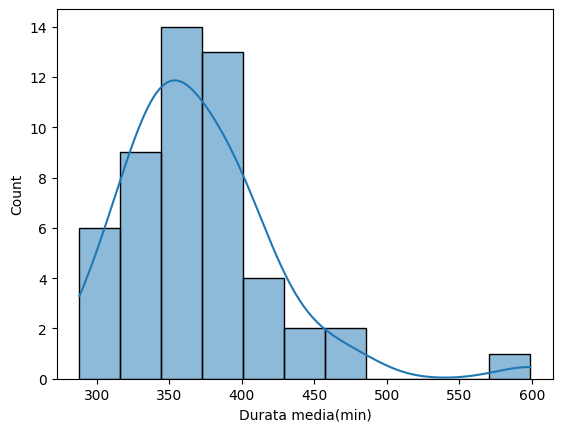

In [53]:
#plot con seaborn
import seaborn as sns

sns.histplot(df, x='Durata media(min)', kde=True)

<Axes: xlabel='Esigenza media di sonno(min)', ylabel='Count'>

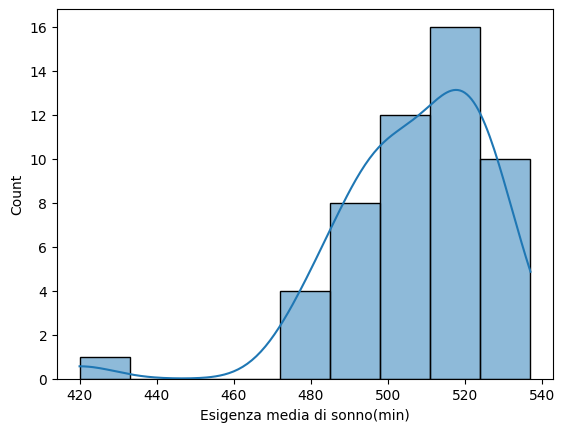

In [55]:
sns.histplot(df, x='Esigenza media di sonno(min)', kde=True)

<Axes: xlabel='Data Inizio', ylabel='Media pun.'>

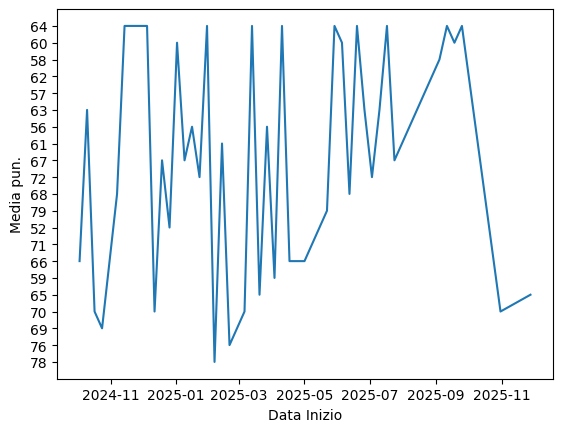

In [57]:
#trend 
sns.lineplot(data=df, x='Data Inizio', y='Media pun.')

<Axes: xlabel='Data Inizio', ylabel='Esigenza media di sonno(min)'>

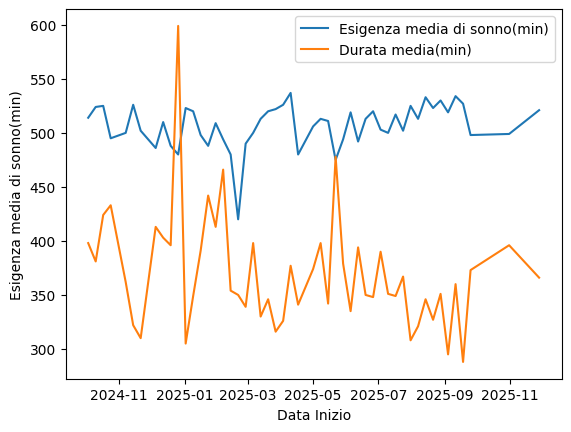

In [63]:
#2 plots
sns.lineplot(data=df, x='Data Inizio', y='Esigenza media di sonno(min)', label='Esigenza media di sonno(min)')
sns.lineplot(data=df, x='Data Inizio', y='Durata media(min)', label='Durata media(min)', legend=True)

<Axes: xlabel='Durata media(min)', ylabel='Esigenza media di sonno(min)'>

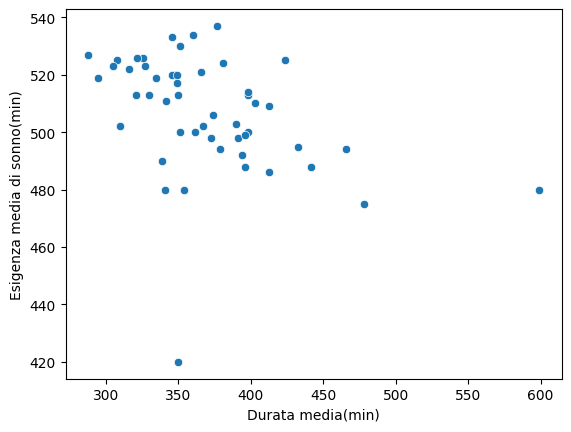

In [59]:
#correlazione tra durata sonno e Esigenza 
sns.scatterplot(data=df, x='Durata media(min)', y='Esigenza media di sonno(min)')